# Phase 4 NLP ML Project

- What trends are we seeing. What do people like

![Image Description](Image/Twitter1.png)

# Tensor Flow Details

In [1]:
conda activate TFgpu


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [3]:
# pip cache purge

In [4]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Create a simple TensorFlow computation graph
a = tf.constant(3.0)
b = tf.constant(4.0)
c = tf.add(a, b)

# Execute the computation graph
result = c.numpy()

# Print the result
print("Result:", result)

TensorFlow version: 2.10.0
Result: 7.0


# Load Python Packages & DF

In [5]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer, sent_tokenize
import string
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud
from afinn import Afinn
from nltk.corpus import sentiwordnet as swn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import unicodedata
from imblearn.over_sampling import SMOTE

In [6]:
# Read the dataset
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

In [7]:
# Remove tweets with unknown sentiment
df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

In [8]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

# Clean Data

In [ ]:
# Tweet NLP
# Part of speech to lemmitizer
# Tune vectorizor
# Hyper perrams
# Stick with NB model for tuning vectorizor 
# Pipeline

#Function Transformer*** is SKLearn function


#POS on limmitization

- Find better ways to analyze the cleaning 

In [11]:
# Clean and preprocess the text
def clean_text(text, custom_stopwords=None):
    if pd.isnull(text):
        return ''
    else:
        # Convert to lowercase
        text = text.lower()

        # Remove non-ASCII characters
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')

        # Remove mentions and URLs
        text = re.sub(r'@\w+', 'USER', text)
        text = re.sub(r'http\S+|www\S+', 'URL', text)

        # Remove special characters and symbols
        text = re.sub(r'[^\w\s]', '', text)

        # Tokenization
        tokens = nltk.word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        if custom_stopwords:
            stop_words.update(custom_stopwords)
        tokens = [token for token in tokens if token not in stop_words]

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        return ' '.join(tokens)

# Example usage
df['cleaned_tweet'] = df['tweet_text'].apply(clean_text, custom_stopwords=['sxsw', 'link', 'google', 'ipad', 'apple', '2' ])

In [33]:
# add part of speech to increase the ethicacy of my lemmatizer (NLP modeling)

# Do before adding custome stop words

In [12]:
df['cleaned_tweet']

0       USER 3g iphone 3 hr tweeting rise_austin dead ...
1       USER know USER awesome ipadiphone app youll li...
2                                     USER wait also sale
3       USER hope year festival isnt crashy year iphon...
4       USER great stuff fri marissa mayer tim oreilly...
                              ...                        
9088                                           everywhere
9089    wave buzz rt USER interrupt regularly schedule...
9090    google zeiger physician never reported potenti...
9091    verizon iphone customer complained time fell b...
9092       iiau_eioaaa_a_uart USER test uicheckin offersu
Name: cleaned_tweet, Length: 8937, dtype: object

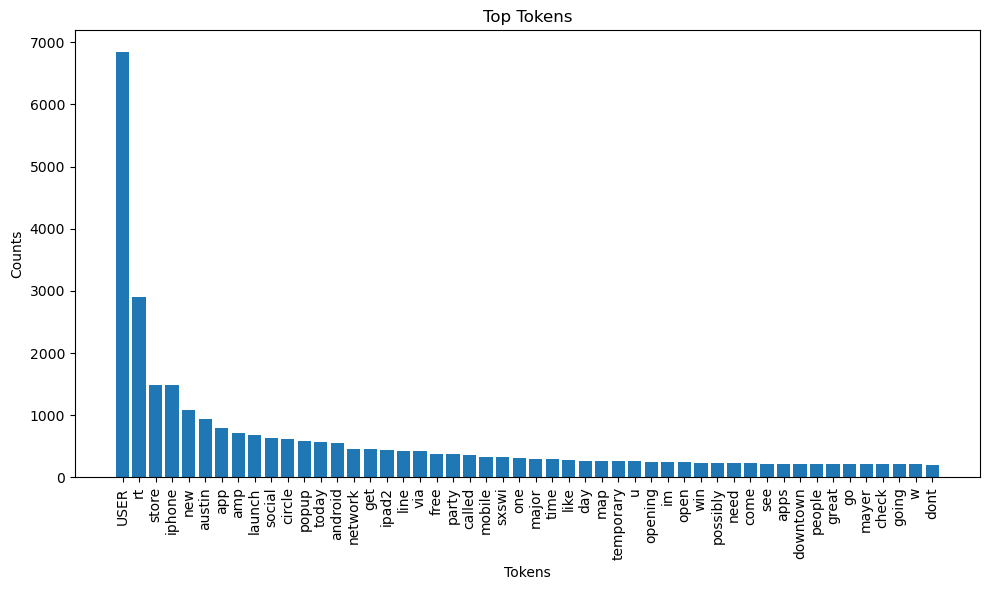

In [13]:
from nltk.tokenize import word_tokenize

# Tokenize each cleaned tweet
tokenized_tweets = [word_tokenize(tweet) for tweet in df['cleaned_tweet']]

# Flatten the list of tokenized tweets
all_tokens = [token for tweet_tokens in tokenized_tweets for token in tweet_tokens]

# Count the occurrences of each token
token_counts = nltk.FreqDist(all_tokens)

# Get the top tokens and their counts
num_top_tokens = 50  # Choose the desired number of top tokens to display
top_tokens = token_counts.most_common(num_top_tokens)

# Extract the tokens and counts for plotting
tokens = [token for token, count in top_tokens]
counts = [count for token, count in top_tokens]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(tokens, counts)
plt.xlabel('Tokens')
plt.ylabel('Counts')
plt.title('Top Tokens')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Split Data

In [14]:
# Split the data into X and y
X = df['cleaned_tweet']
y = df['is_there_an_emotion_directed_at_a_brand_or_product']

In [15]:
X.shape

(8937,)

In [16]:
y.shape

(8937,)

In [17]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape

(7149,)

In [19]:
y_train.shape

(7149,)

# Vectorize

In [ ]:
# Missing hyperperameters !!!



In [20]:
# Vectorize the tweets using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [21]:
# Get the feature names from the vocabulary dictionary
feature_names = vectorizer.get_feature_names_out()

# Convert the sparse matrix to a DataFrame for visualization
X_vec_df = pd.DataFrame(X_train_vectorized.toarray(), columns=feature_names)
print(X_vec_df)

      02  03  0310  0310apple  031111  031211  031311  031411  031511  10  \
0      0   0     0          0       0       0       0       0       0   0   
1      0   0     0          0       0       0       0       0       0   0   
2      0   0     0          0       0       0       0       0       0   0   
3      0   0     0          0       0       0       0       0       0   0   
4      0   0     0          0       0       0       0       0       0   0   
...   ..  ..   ...        ...     ...     ...     ...     ...     ...  ..   
7144   0   0     0          0       0       0       0       0       0   0   
7145   0   0     0          0       0       0       0       0       0   0   
7146   0   0     0          0       0       0       0       0       0   0   
7147   0   0     0          0       0       0       0       0       0   0   
7148   0   0     0          0       0       0       0       0       0   0   

      ...  zite  zlf  zms  zomb  zombie  zomg  zone  zoom  zuckerberg  zyng

In [22]:
X_train_vectorized.shape

(7149, 8978)

In [23]:
X_test_vectorized.shape

(1788, 8978)

# SMOTE

In [24]:
# Apply SMOTE to the training data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

In [25]:
X_train_resampled.shape

(12882, 8978)

In [26]:
y_train_resampled.shape

(12882,)

# Logistic Regression Model with Scaling

In [27]:
# Scale the input features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_resampled.toarray())
X_test_scaled = scaler.transform(X_test_vectorized.toarray())


# Train the logistic regression model on the scaled data
logreg = LogisticRegression(max_iter=3000)
logreg.fit(X_train_scaled, y_train_resampled)

# Make predictions on the scaled test data
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5838926174496645
Classification Report:
                                    precision    recall  f1-score   support

                  Negative emotion       0.27      0.36      0.31       122
No emotion toward brand or product       0.71      0.64      0.67      1095
                  Positive emotion       0.47      0.53      0.50       571

                          accuracy                           0.58      1788
                         macro avg       0.48      0.51      0.49      1788
                      weighted avg       0.60      0.58      0.59      1788

Confusion Matrix:
[[ 44  47  31]
 [ 88 696 311]
 [ 33 234 304]]


# Naive Bayes Model

In [28]:
from sklearn.naive_bayes import MultinomialNB

# Create a Naive Bayes classifier
nb = MultinomialNB()

# Train the Naive Bayes model
nb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_nb = nb.predict(X_test_vectorized)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print('Accuracy (Naive Bayes):', accuracy_nb)
print('Classification Report (Naive Bayes):')
print(classification_report(y_test, y_pred_nb))

Accuracy (Naive Bayes): 0.5967561521252797
Classification Report (Naive Bayes):
                                    precision    recall  f1-score   support

                  Negative emotion       0.31      0.39      0.35       122
No emotion toward brand or product       0.75      0.60      0.67      1095
                  Positive emotion       0.48      0.63      0.54       571

                          accuracy                           0.60      1788
                         macro avg       0.51      0.54      0.52      1788
                      weighted avg       0.63      0.60      0.61      1788



# RandomForest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Train the Random Forest model
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_vectorized)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy (Random Forest):', accuracy_rf)
print('Classification Report (Random Forest):')
print(classification_report(y_test, y_pred_rf))

Accuracy (Random Forest): 0.5469798657718121
Classification Report (Random Forest):
                                    precision    recall  f1-score   support

                  Negative emotion       0.17      0.29      0.21       122
No emotion toward brand or product       0.76      0.53      0.62      1095
                  Positive emotion       0.45      0.64      0.53       571

                          accuracy                           0.55      1788
                         macro avg       0.46      0.49      0.45      1788
                      weighted avg       0.62      0.55      0.56      1788



# Deep Learning Model

In [30]:
# import tensorflow as tf
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report

# # Preprocess the text data
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(df['cleaned_tweet'])
# X = tokenizer.texts_to_sequences(df['cleaned_tweet'])
# X = pad_sequences(X)

# # Convert target labels to categorical
# y = pd.get_dummies(df['is_there_an_emotion_directed_at_a_brand_or_product']).values

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# # Define the model architecture
# model = Sequential()
# model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X_train.shape[1]))
# model.add(LSTM(units=64))
# model.add(Dense(units=y_train.shape[1], activation='softmax'))

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(X_train_resampled, y_train_resampled, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# # Make predictions on the test set
# y_pred_dl_probs = model.predict(X_test)
# y_pred_dl = np.argmax(y_pred_dl_probs, axis=1)

# # Evaluate the model
# accuracy_dl = accuracy_score(np.argmax(y_test, axis=1), y_pred_dl)
# print('Accuracy (Deep Learning):', accuracy_dl)
# print('Classification Report (Deep Learning):')
# print(classification_report(np.argmax(y_test, axis=1), y_pred_dl))

In [31]:
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from sklearn.preprocessing import OneHotEncoder

# # Instantiate the OneHotEncoder
# encoder = OneHotEncoder()

# # Fit and transform the target variable
# y_train_encoded = encoder.fit_transform(y_train_resampled.values.reshape(-1, 1)).toarray()

# # Define the model architecture
# model = keras.Sequential()
# model.add(layers.Dense(64, activation='relu', input_dim=X_train_resampled.shape[1]))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(y_train_encoded.shape[1], activation='softmax'))

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(X_train_resampled, y_train_encoded, epochs=10, batch_size=32)

# # Evaluate the model on the test data
# y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).toarray()
# loss, accuracy = model.evaluate(X_test_vectorized, y_test_encoded)
# print(f'Test loss: {loss:.4f}')
# print(f'Test accuracy: {accuracy:.4f}')

# # Make predictions
# predictions = model.predict(X_test_vectorized)

In [ ]:
print(X_test_vectorized.shape)
print(y_test_encoded.shape)

# Dummy Model

In [32]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a dummy classifier that predicts the majority class
dummy = DummyClassifier(strategy='most_frequent')

# Train the dummy classifier
dummy.fit(X_train, y_train)

# Make predictions using the dummy classifier
y_pred_dummy = dummy.predict(X_test)

# Evaluate the dummy model
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
print('Accuracy (Dummy Model):', accuracy_dummy)
print('Classification Report (Dummy Model):')
print(classification_report(y_test, y_pred_dummy, zero_division=1))

Accuracy (Dummy Model): 0.6124161073825504
Classification Report (Dummy Model):
                                    precision    recall  f1-score   support

                  Negative emotion       1.00      0.00      0.00       122
No emotion toward brand or product       0.61      1.00      0.76      1095
                  Positive emotion       1.00      0.00      0.00       571

                          accuracy                           0.61      1788
                         macro avg       0.87      0.33      0.25      1788
                      weighted avg       0.76      0.61      0.47      1788



# Review Top Tokens

In [ ]:
from nltk.tokenize import word_tokenize

# Tokenize each cleaned tweet
tokenized_tweets = [word_tokenize(tweet) for tweet in df['cleaned_tweet']]

# Flatten the list of tokenized tweets
all_tokens = [token for tweet_tokens in tokenized_tweets for token in tweet_tokens]

# Count the occurrences of each token
token_counts = nltk.FreqDist(all_tokens)

# Get the top tokens and their counts
num_top_tokens = 50  # Choose the desired number of top tokens to display
top_tokens = token_counts.most_common(num_top_tokens)

# Extract the tokens and counts for plotting
tokens = [token for token, count in top_tokens]
counts = [count for token, count in top_tokens]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(tokens, counts)
plt.xlabel('Tokens')
plt.ylabel('Counts')
plt.title('Top Tokens')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Combine preprocessed text into a single string
all_text = ' '.join(df['cleaned_tweet'])

from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([all_text])

# Get the word-to-index mapping
word_index = tokenizer.word_index

total_tokens = len(word_index)
print("Total unique tokens:", total_tokens)

In [ ]:
from nltk.probability import FreqDist

# Get the token counts
token_counts = FreqDist(all_text.split())

# Print the most common tokens and their frequencies
num_common_tokens = 10  # Choose the desired number of most common tokens to display
common_tokens = token_counts.most_common(num_common_tokens)
for token, frequency in common_tokens:
    print("Token:", token, "\tFrequency:", frequency)

# Understand Vectorizor 
- Does this replace needing to clean the data (lowercase, ect)? Where does it fit in the overall model process?

# Step 1: Feature Engineering
- Before training a sentiment analysis model, it's important to engineer relevant features from your data. Some possible features you can consider are:

- Word frequency: Calculate the frequency of each word in the tweet text and add it as a feature.
- Character count: Count the number of characters in each tweet and add it as a feature.
- Hashtags and mentions: Extract hashtags and mentions from the tweets and add them as features.
- Sentiment lexicons: Utilize pre-built sentiment lexicons such as AFINN or SentiWordNet and assign sentiment scores to words in the tweets.

# Word Frequency:

 1) Calculate the frequency of each word in the tweet text: Count the occurrences of each word in the tweet and create a feature that represents the frequency of each word. Tools: You can use the Counter class from the Python collections module to count word frequencies.

2) Character Count: Count the number of characters in each tweet: Determine the length of each tweet in terms of the number of characters and add it as a feature. Tools: You can use the len() function in Python to calculate the length of each tweet.

3) Hashtags and Mentions: Extract hashtags and mentions from the tweets: Parse the tweet text to identify hashtags (words or phrases preceded by the '#' symbol) and mentions (usernames preceded by the '@' symbol). Add them as features: Create binary features indicating the presence or absence of specific hashtags or mentions in the tweet. Tools: You can use regular expressions (re module) in Python to extract hashtags and mentions from the tweet text.

4) Sentiment Lexicons: Utilize pre-built sentiment lexicons: Sentiment lexicons are dictionaries or databases that associate words with sentiment scores. They can help assign sentiment scores to individual words in the tweets. Assign sentiment scores: Look up each word in the tweet text in the sentiment lexicon and assign sentiment scores to those words. Tools: You can use pre-built sentiment lexicons such as AFINN (which assigns a sentiment score between -5 and +5 to words) or SentiWordNet (which provides sentiment scores based on WordNet synsets).

# Dummy Model
- Build a dummy model

# Step 2: Splitting the Data
- Split your dataset into training and testing sets. This will allow you to train your model on a portion of the data and evaluate its performance on unseen data. The commonly used split ratio is 80% for training and 20% for testing. You can use the train_test_split function from scikit-learn to perform the split.

# Step 3: Choosing a Model

- Select an appropriate machine learning model for sentiment analysis. Some popular choices are:

# Naive Bayes Classifier: It is simple and effective for text classification tasks.
- Support Vector Machines (SVM): It performs well in high-dimensional spaces and is often used for text classification.
- Recurrent Neural Networks (RNN) or Long Short-Term Memory (LSTM) networks: These models can capture the sequential nature of text data.

# Step 4: Model Training and Evaluation
- Train your selected model on the training set using the engineered features. Evaluate the performance of the trained model on the testing set. Common evaluation metrics for sentiment analysis include accuracy, precision, recall, and F1-score. You can use scikit-learn's fit() and predict() functions to train and evaluate the model.

# Step 5: Hyperparameter Tuning
- Optimize the performance of your model by tuning its hyperparameters. This involves trying different combinations of hyperparameters and selecting the ones that result in the best performance. You can use techniques like grid search or random search to find the optimal hyperparameters.

# Step 6: Model Deployment
- Once you have trained and fine-tuned your sentiment analysis model, you can deploy it to make predictions on new, unseen data. This can involve integrating the model into a web application, creating an API, or using it for real-time sentiment analysis.